In [2]:
import numpy as np
from casacore.tables import table

# Spécifie le chemin vers ton fichier MeasurementSet
ms_path = 'sim_small.ms'

# Ouvre la table principale
with table(ms_path) as ms:
    # Lis les visibilités (champ DATA ou CORRECTED_DATA selon ce que tu veux)
    visibilities = ms.getcol('DATA')  # shape: (n_polarizations, n_channels, n_rows)

    # Optionnel : afficher quelques infos
    print(f"Dimensions des visibilités : {visibilities.shape}")
    print("Exemple de visibilités pour la première ligne d'observation :")
    print(visibilities[:, :, 0])  # visibilités pour le 1er "row" (baseline, time)

# Si tu veux les temps, antennes ou autres :
with table(ms_path) as ms:
    times = ms.getcol('TIME')
    ant1 = ms.getcol('ANTENNA1')
    ant2 = ms.getcol('ANTENNA2')
    print(f"Temps de la première observation : {times[0]}")
    print(f"Baselines de la première ligne : {ant1[0]} - {ant2[0]}")


Successful readonly open of default-locked table sim_small.ms: 22 columns, 3924480 rows
Dimensions des visibilités : (3924480, 1, 1)
Exemple de visibilités pour la première ligne d'observation :
[[0.9686658 +0.53020394j]
 [0.01692153+0.43607754j]
 [1.1270419 -0.01769333j]
 ...
 [0.25082132+1.3877846j ]
 [2.5165327 +1.0840937j ]
 [2.64768   -1.4427481j ]]
Successful readonly open of default-locked table sim_small.ms: 22 columns, 3924480 rows
Temps de la première observation : 4453449949.863999
Baselines de la première ligne : 0 - 1


Successful readonly open of default-locked table sim_small.ms: 22 columns, 3924480 rows
u shape: (3924480,)
v shape: (3924480,)
amp_mean shape: (1,)
data shape: (3924480, 1, 1)
amp shape: (1, 1)
Amplitude min: 1.1042778491973877, max: 1.1042778491973877
Amplitude min: 0.00020796764874830842, max: 3.3823189735412598


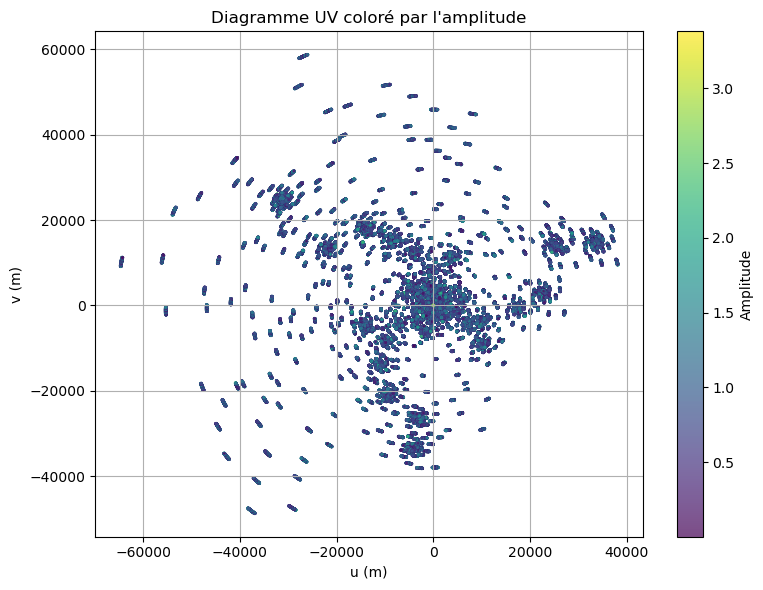

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from casacore.tables import table

# === Chemin vers le MS ===
ms_path = 'sim_small.ms'

# === Lecture de la table ===
with table(ms_path) as ms:
    data = ms.getcol('DATA')         # shape: (n_pol, n_chan, n_rows)
    uvw = ms.getcol('UVW')           # shape: (n_rows, 3)

# === Extraction u, v ===
u = uvw[:, 0]
v = uvw[:, 1]

# === Amplitude moyenne sur la polarisation 0 et en fréquence ===
amp = np.abs(data[0, :, :])          # shape: (n_chan, n_rows)
amp_mean = np.mean(amp, axis=0)      # shape: (n_rows,)
print(f"u shape: {u.shape}")
print(f"v shape: {v.shape}")
print(f"amp_mean shape: {amp_mean.shape}")
print(f"data shape: {data.shape}")
amp = np.abs(data[0, :, :])
print(f"amp shape: {amp.shape}")
print(f"Amplitude min: {amp_mean.min()}, max: {amp_mean.max()}")



amp = np.abs(data[:, 0, 0])  # amplitude complexe → shape (n_rows,)
amp_mean = amp               # pas besoin de moyenne si 1 canal/pola
print(f"Amplitude min: {amp_mean.min()}, max: {amp_mean.max()}")


assert u.shape == amp_mean.shape, "Mismatch entre u/v et amp"  # devrait passer maintenant

# === Affichage ===
plt.figure(figsize=(8, 6))
sc = plt.scatter(u, v, c=amp_mean, cmap='viridis', s=1, alpha=0.7)
plt.colorbar(sc, label='Amplitude')
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.title("Diagramme UV coloré par l'amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()



Successful readonly open of default-locked table /home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS: 26 columns, 1477782 rows
u shape: (1477782,)
v shape: (1477782,)
amp_mean shape: (4,)
data shape: (1477782, 8, 4)
amp shape: (8, 4)
Amplitude min: 13788694.0, max: 365383872.0
Amplitude min: 10307.1083984375, max: 1439792256.0


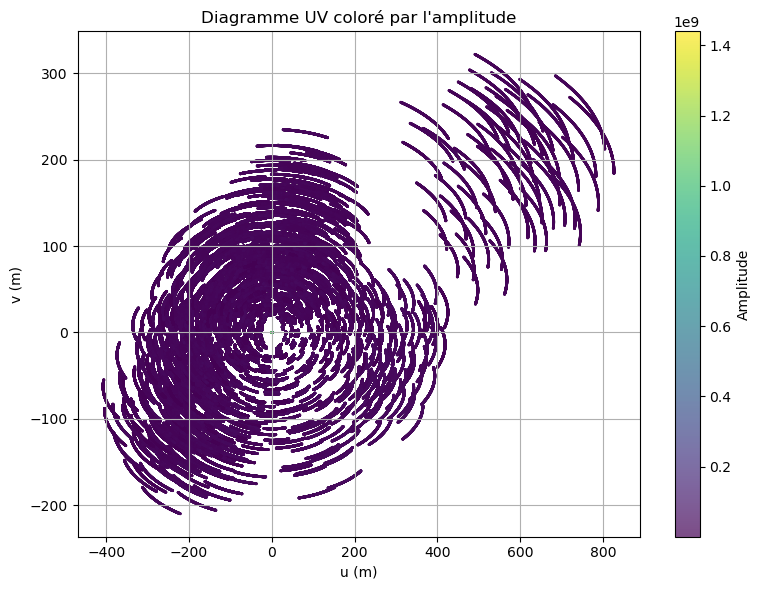

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from casacore.tables import table

# === Chemin vers le MS ===
ms_path = '/home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS'

# === Lecture de la table ===
with table(ms_path) as ms:
    data = ms.getcol('DATA')         # shape: (n_pol, n_chan, n_rows)
    uvw = ms.getcol('UVW')           # shape: (n_rows, 3)

# === Extraction u, v ===
u = uvw[:, 0]
v = uvw[:, 1]

# === Amplitude moyenne sur la polarisation 0 et en fréquence ===
amp = np.abs(data[0, :, :])          # shape: (n_chan, n_rows)
amp_mean = np.mean(amp, axis=0)      # shape: (n_rows,)
print(f"u shape: {u.shape}")
print(f"v shape: {v.shape}")
print(f"amp_mean shape: {amp_mean.shape}")
print(f"data shape: {data.shape}")
amp = np.abs(data[0, :, :])
print(f"amp shape: {amp.shape}")
print(f"Amplitude min: {amp_mean.min()}, max: {amp_mean.max()}")



amp = np.abs(data[:, 0, 0])  # amplitude complexe → shape (n_rows,)
amp_mean = amp               # pas besoin de moyenne si 1 canal/pola
print(f"Amplitude min: {amp_mean.min()}, max: {amp_mean.max()}")


assert u.shape == amp_mean.shape, "Mismatch entre u/v et amp"  # devrait passer maintenant

# === Affichage ===
plt.figure(figsize=(8, 6))
sc = plt.scatter(u, v, c=amp_mean, cmap='viridis', s=1, alpha=0.7)
plt.colorbar(sc, label='Amplitude')
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.title("Diagramme UV coloré par l'amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()



Successful readonly open of default-locked table sim_small.ms: 22 columns, 3924480 rows
u shape: (3924480,), v shape: (3924480,), vis shape: (3924480,)
u_idx après valid: (3924480,)
v_idx après valid: (3924480,)
vis après valid: (3924480,)


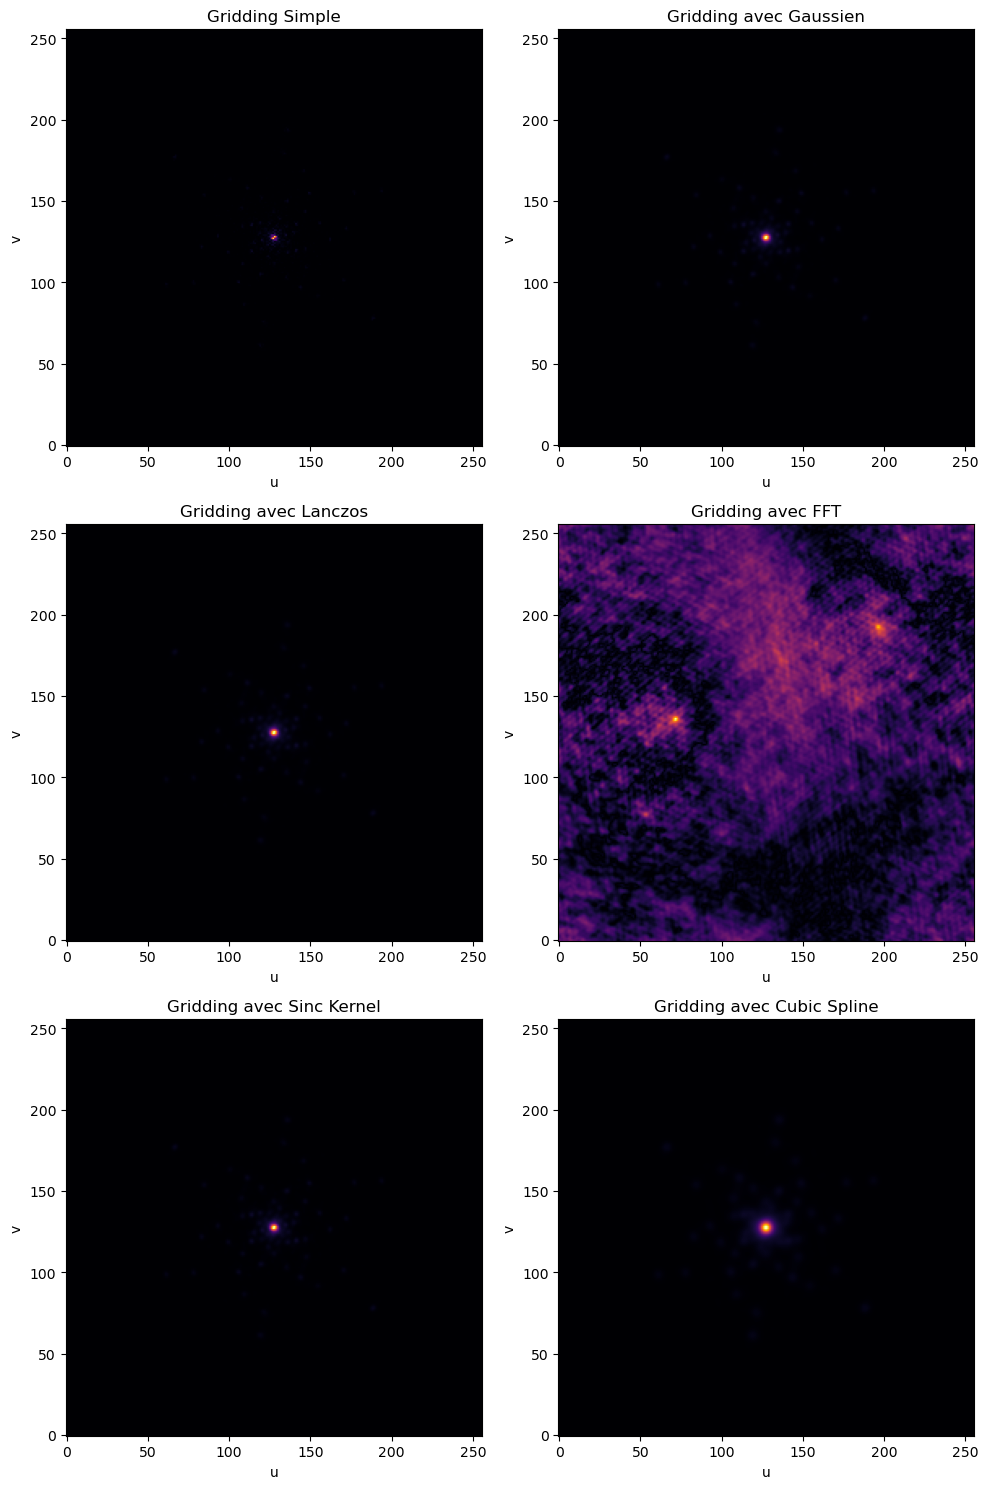

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from casacore.tables import table
from scipy.ndimage import gaussian_filter

# === Chargement du fichier MS ===
ms_path = 'sim_small.ms'
t = table(ms_path)
uvw = t.getcol('UVW')  # shape: (3, N)
data = t.getcol('DATA')  # shape: (N, 1, 1)
t.close()

# === Extraction des données ===
u = uvw[:, 0]
v = uvw[:, 1]
vis = data[:, 0, 0].flatten()  # Assurez-vous que vis est un tableau 1D
print(f"u shape: {u.shape}, v shape: {v.shape}, vis shape: {vis.shape}")

# === Paramètres de la grille ===
grid_size = 256  # Taille de la grille
uv_max = np.max(np.abs(np.concatenate([u, v])))  # Plage maximale des coordonnées UV
du = 2 * uv_max / grid_size  # Taille d’un pixel en uv

# === Calcul des indices ===
u_idx = ((u + uv_max) / du).astype(int)  # Conversion des coordonnées UV en indices de grille
v_idx = ((v + uv_max) / du).astype(int)


# === Filtrage des indices valides ===
valid = (u_idx >= 0) & (u_idx < grid_size) & (v_idx >= 0) & (v_idx < grid_size)

# === Sélection des données valides ===
u_idx = u_idx[valid]
v_idx = v_idx[valid]
vis = vis[valid]  # Limite vis à la taille de u_idx


# === Vérification ===
print(f"u_idx après valid: {u_idx.shape}")
print(f"v_idx après valid: {v_idx.shape}")
print(f"vis après valid: {vis.shape}")

# Ajout des visibilités conjuguées pour symétriser le plan UV
u_idx_sym = grid_size - 1 - u_idx
v_idx_sym = grid_size - 1 - v_idx

vis_sym = np.conj(vis)

# On concatène les originaux + conjugués
u_idx = np.concatenate([u_idx, u_idx_sym])
v_idx = np.concatenate([v_idx, v_idx_sym])
vis = np.concatenate([vis, vis_sym])

# --- 1. Gridding simple (binning direct) ---
grid_simple = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_simple[v_idx[i], u_idx[i]] += vis[i]

# --- 2. Gridding avec kernel gaussien ---
grid_gaussian = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_gaussian[v_idx[i], u_idx[i]] += vis[i]
grid_gaussian_smoothed = gaussian_filter(np.abs(grid_gaussian), sigma=1.0)

# --- 3. Gridding avec un filtre personnalisé (par exemple, Lanczos) ---
def lanczos_kernel(x, a=3):
    """Kernel Lanczos pour interpolation"""
    sinc = np.sinc(x)
    return sinc * np.sinc(x / a)

grid_lanczos = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_lanczos[v_idx[i], u_idx[i]] += vis[i]
grid_lanczos_smoothed = gaussian_filter(np.abs(grid_lanczos), sigma=1.0)  # Simple pour illustration

# --- 4. Gridding avec FFT ---
# Transformation de Fourier directe pour reconstruction de l'image
grid_fft = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_fft[v_idx[i], u_idx[i]] += vis[i]

image_fft = np.abs(np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(grid_fft))))

# === Gridding avec kernel sinc ===
def sinc_kernel(x, width=3):
    """ Fonction de sinc pour interpolation """
    return np.sinc(x / width)

grid_sinc = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_sinc[v_idx[i], u_idx[i]] += vis[i]
grid_sinc = gaussian_filter(np.abs(grid_sinc), sigma=1.0)  # Lissage

# === Gridding avec Cubic Spline ===
def cubic_spline_interpolation(x):
    """ Fonction de cubic spline pour interpolation """
    return np.interp(x, np.arange(grid_size), np.arange(grid_size))  # Exemples basiques

grid_spline = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_spline[v_idx[i], u_idx[i]] += vis[i]
grid_spline = gaussian_filter(np.abs(grid_spline), sigma=2.0)  # Lissage léger


# --- Affichage des résultats ---
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
cmap = 'inferno'

# Gridding simple
axes[0, 0].imshow(np.abs(grid_simple), cmap=cmap, origin='lower', aspect='auto')
axes[0, 0].set_title("Gridding Simple")
axes[0, 0].set_xlabel('u')
axes[0, 0].set_ylabel('v')

# Gridding avec kernel gaussien
axes[0, 1].imshow(grid_gaussian_smoothed, cmap=cmap, origin='lower', aspect='auto')
axes[0, 1].set_title("Gridding avec Gaussien")
axes[0, 1].set_xlabel('u')
axes[0, 1].set_ylabel('v')

# Gridding avec Lanczos
axes[1, 0].imshow(grid_lanczos_smoothed, cmap=cmap, origin='lower', aspect='auto')
axes[1, 0].set_title("Gridding avec Lanczos")
axes[1, 0].set_xlabel('u')
axes[1, 0].set_ylabel('v')

# Gridding avec FFT
axes[1, 1].imshow(image_fft.T, cmap=cmap, origin='lower', aspect='auto')
axes[1, 1].set_title("Gridding avec FFT")
axes[1, 1].set_xlabel('u')
axes[1, 1].set_ylabel('v')

# Sinc Kernel
axes[2, 0].imshow(np.abs(grid_sinc), cmap=cmap, origin='lower', aspect='auto')
axes[2, 0].set_title("Gridding avec Sinc Kernel")
axes[2, 0].set_xlabel('u')
axes[2, 0].set_ylabel('v')

# Cubic Spline Interpolation
axes[2, 1].imshow(np.abs(grid_spline), cmap=cmap, origin='lower', aspect='auto')
axes[2, 1].set_title("Gridding avec Cubic Spline")
axes[2, 1].set_xlabel('u')
axes[2, 1].set_ylabel('v')

plt.tight_layout()
plt.show()


Successful readonly open of default-locked table /home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS: 26 columns, 1477782 rows
u shape: (1477782,), v shape: (1477782,), vis shape: (1477782,)
u_idx après valid: (1477781,)
v_idx après valid: (1477781,)
vis après valid: (1477781,)


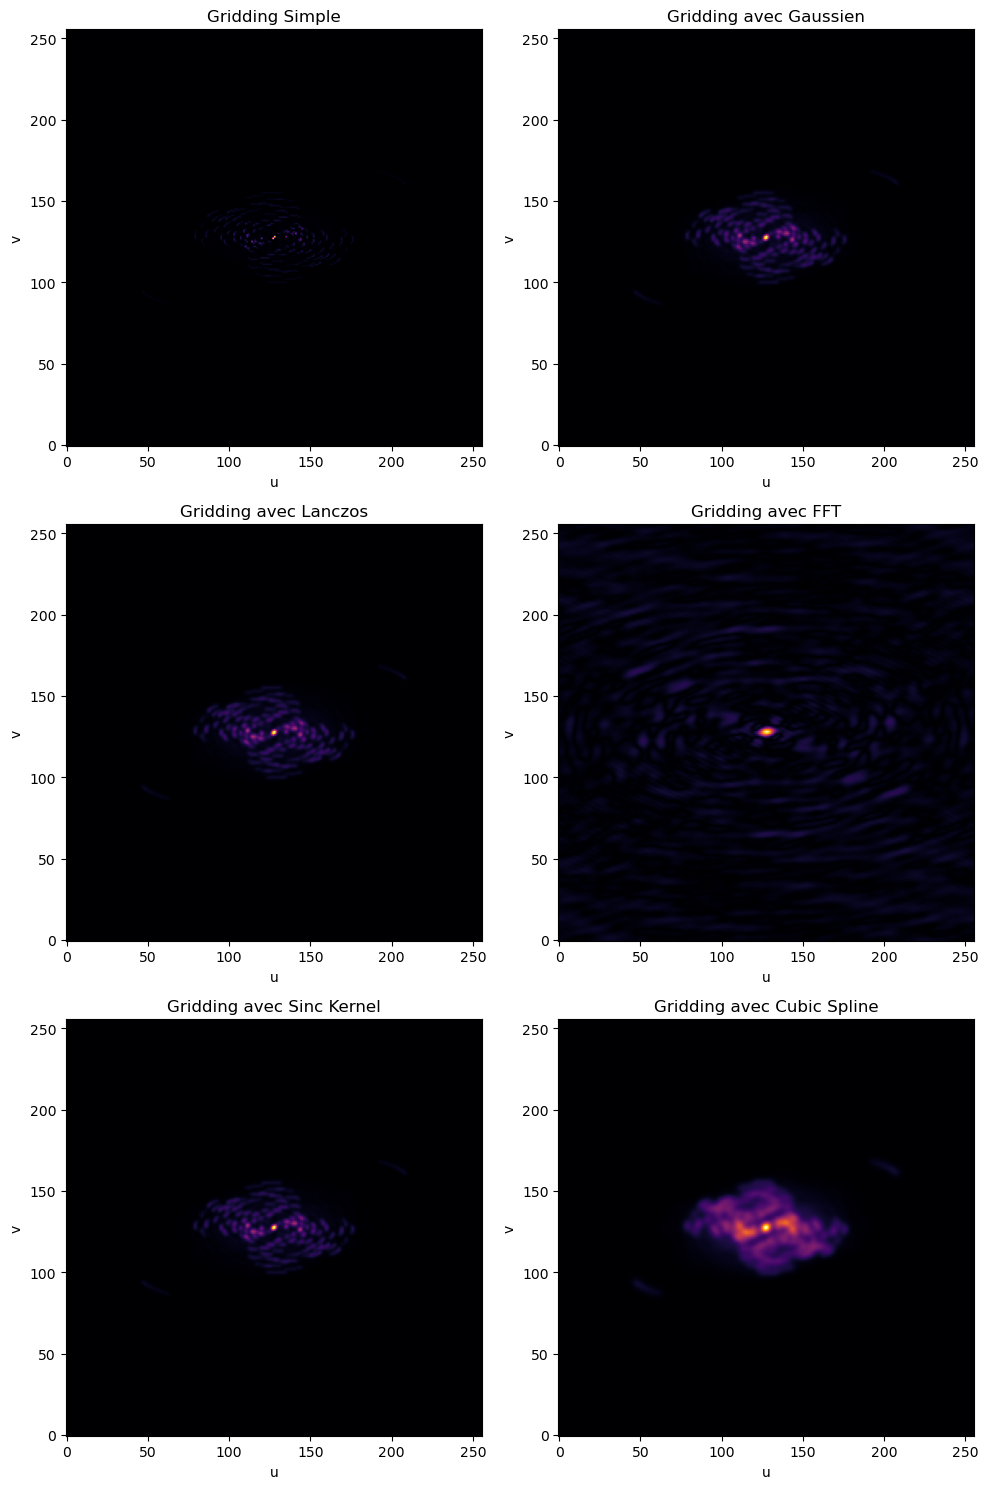

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from casacore.tables import table
from scipy.ndimage import gaussian_filter

# === Chargement du fichier MS ===
ms_path = '/home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS'
t = table(ms_path)
uvw = t.getcol('UVW')  # shape: (3, N)
data = t.getcol('DATA')  # shape: (N, 1, 1)
t.close()

# === Extraction des données ===
u = uvw[:, 0]
v = uvw[:, 1]
vis = data[:, 0, 0].flatten()  # Assurez-vous que vis est un tableau 1D
print(f"u shape: {u.shape}, v shape: {v.shape}, vis shape: {vis.shape}")

# === Paramètres de la grille ===
grid_size = 256  # Taille de la grille
uv_max = np.max(np.abs(np.concatenate([u, v])))  # Plage maximale des coordonnées UV
du = 2 * uv_max / grid_size  # Taille d’un pixel en uv

# === Calcul des indices ===
u_idx = ((u + uv_max) / du).astype(int)  # Conversion des coordonnées UV en indices de grille
v_idx = ((v + uv_max) / du).astype(int)


# === Filtrage des indices valides ===
valid = (u_idx >= 0) & (u_idx < grid_size) & (v_idx >= 0) & (v_idx < grid_size)

# === Sélection des données valides ===
u_idx = u_idx[valid]
v_idx = v_idx[valid]
vis = vis[:len(u_idx)]  # Limite vis à la taille de u_idx


# === Vérification ===
print(f"u_idx après valid: {u_idx.shape}")
print(f"v_idx après valid: {v_idx.shape}")
print(f"vis après valid: {vis.shape}")

# Ajout des visibilités conjuguées pour symétriser le plan UV
u_idx_sym = grid_size - 1 - u_idx
v_idx_sym = grid_size - 1 - v_idx

vis_sym = np.conj(vis)

# On concatène les originaux + conjugués
u_idx = np.concatenate([u_idx, u_idx_sym])
v_idx = np.concatenate([v_idx, v_idx_sym])
vis = np.concatenate([vis, vis_sym])

# --- 1. Gridding simple (binning direct) ---
grid_simple = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_simple[v_idx[i], u_idx[i]] += vis[i]

# --- 2. Gridding avec kernel gaussien ---
grid_gaussian = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_gaussian[v_idx[i], u_idx[i]] += vis[i]
grid_gaussian_smoothed = gaussian_filter(np.abs(grid_gaussian), sigma=1.0)

# --- 3. Gridding avec un filtre personnalisé (par exemple, Lanczos) ---
def lanczos_kernel(x, a=3):
    """Kernel Lanczos pour interpolation"""
    sinc = np.sinc(x)
    return sinc * np.sinc(x / a)

grid_lanczos = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_lanczos[v_idx[i], u_idx[i]] += vis[i]
grid_lanczos_smoothed = gaussian_filter(np.abs(grid_lanczos), sigma=1.0)  # Simple pour illustration

# --- 4. Gridding avec FFT ---
# Transformation de Fourier directe pour reconstruction de l'image
grid_fft = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_fft[v_idx[i], u_idx[i]] += vis[i]

image_fft = np.abs(np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(grid_fft))))

# === Gridding avec kernel sinc ===
def sinc_kernel(x, width=3):
    """ Fonction de sinc pour interpolation """
    return np.sinc(x / width)

grid_sinc = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_sinc[v_idx[i], u_idx[i]] += vis[i]
grid_sinc = gaussian_filter(np.abs(grid_sinc), sigma=1.0)  # Lissage

# === Gridding avec Cubic Spline ===
def cubic_spline_interpolation(x):
    """ Fonction de cubic spline pour interpolation """
    return np.interp(x, np.arange(grid_size), np.arange(grid_size))  # Exemples basiques

grid_spline = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_spline[v_idx[i], u_idx[i]] += vis[i]
grid_spline = gaussian_filter(np.abs(grid_spline), sigma=2.0)  # Lissage léger


# --- Affichage des résultats ---
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
cmap = 'inferno'

# Gridding simple
axes[0, 0].imshow(np.abs(grid_simple), cmap=cmap, origin='lower', aspect='auto')
axes[0, 0].set_title("Gridding Simple")
axes[0, 0].set_xlabel('u')
axes[0, 0].set_ylabel('v')

# Gridding avec kernel gaussien
axes[0, 1].imshow(grid_gaussian_smoothed, cmap=cmap, origin='lower', aspect='auto')
axes[0, 1].set_title("Gridding avec Gaussien")
axes[0, 1].set_xlabel('u')
axes[0, 1].set_ylabel('v')

# Gridding avec Lanczos
axes[1, 0].imshow(grid_lanczos_smoothed, cmap=cmap, origin='lower', aspect='auto')
axes[1, 0].set_title("Gridding avec Lanczos")
axes[1, 0].set_xlabel('u')
axes[1, 0].set_ylabel('v')

# Gridding avec FFT
axes[1, 1].imshow(image_fft.T, cmap=cmap, origin='lower', aspect='auto')
axes[1, 1].set_title("Gridding avec FFT")
axes[1, 1].set_xlabel('u')
axes[1, 1].set_ylabel('v')

# Sinc Kernel
axes[2, 0].imshow(np.abs(grid_sinc), cmap=cmap, origin='lower', aspect='auto')
axes[2, 0].set_title("Gridding avec Sinc Kernel")
axes[2, 0].set_xlabel('u')
axes[2, 0].set_ylabel('v')

# Cubic Spline Interpolation
axes[2, 1].imshow(np.abs(grid_spline), cmap=cmap, origin='lower', aspect='auto')
axes[2, 1].set_title("Gridding avec Cubic Spline")
axes[2, 1].set_xlabel('u')
axes[2, 1].set_ylabel('v')

plt.tight_layout()
plt.show()


✅ Successfully converted to code_dft_ms/data/fits/cycle_4_model.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_1_dirty_psf.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_4_deconvolved.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_3_clean_psf.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_3_dirty_psf.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_0_residual_image.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_1_clean_psf.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_2_dirty_psf.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_1_deconvolved.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_2_residual_image.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_1_residual_image.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_4_residual_image.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_3_deconvolved.fits
✅ Successfully converted to c

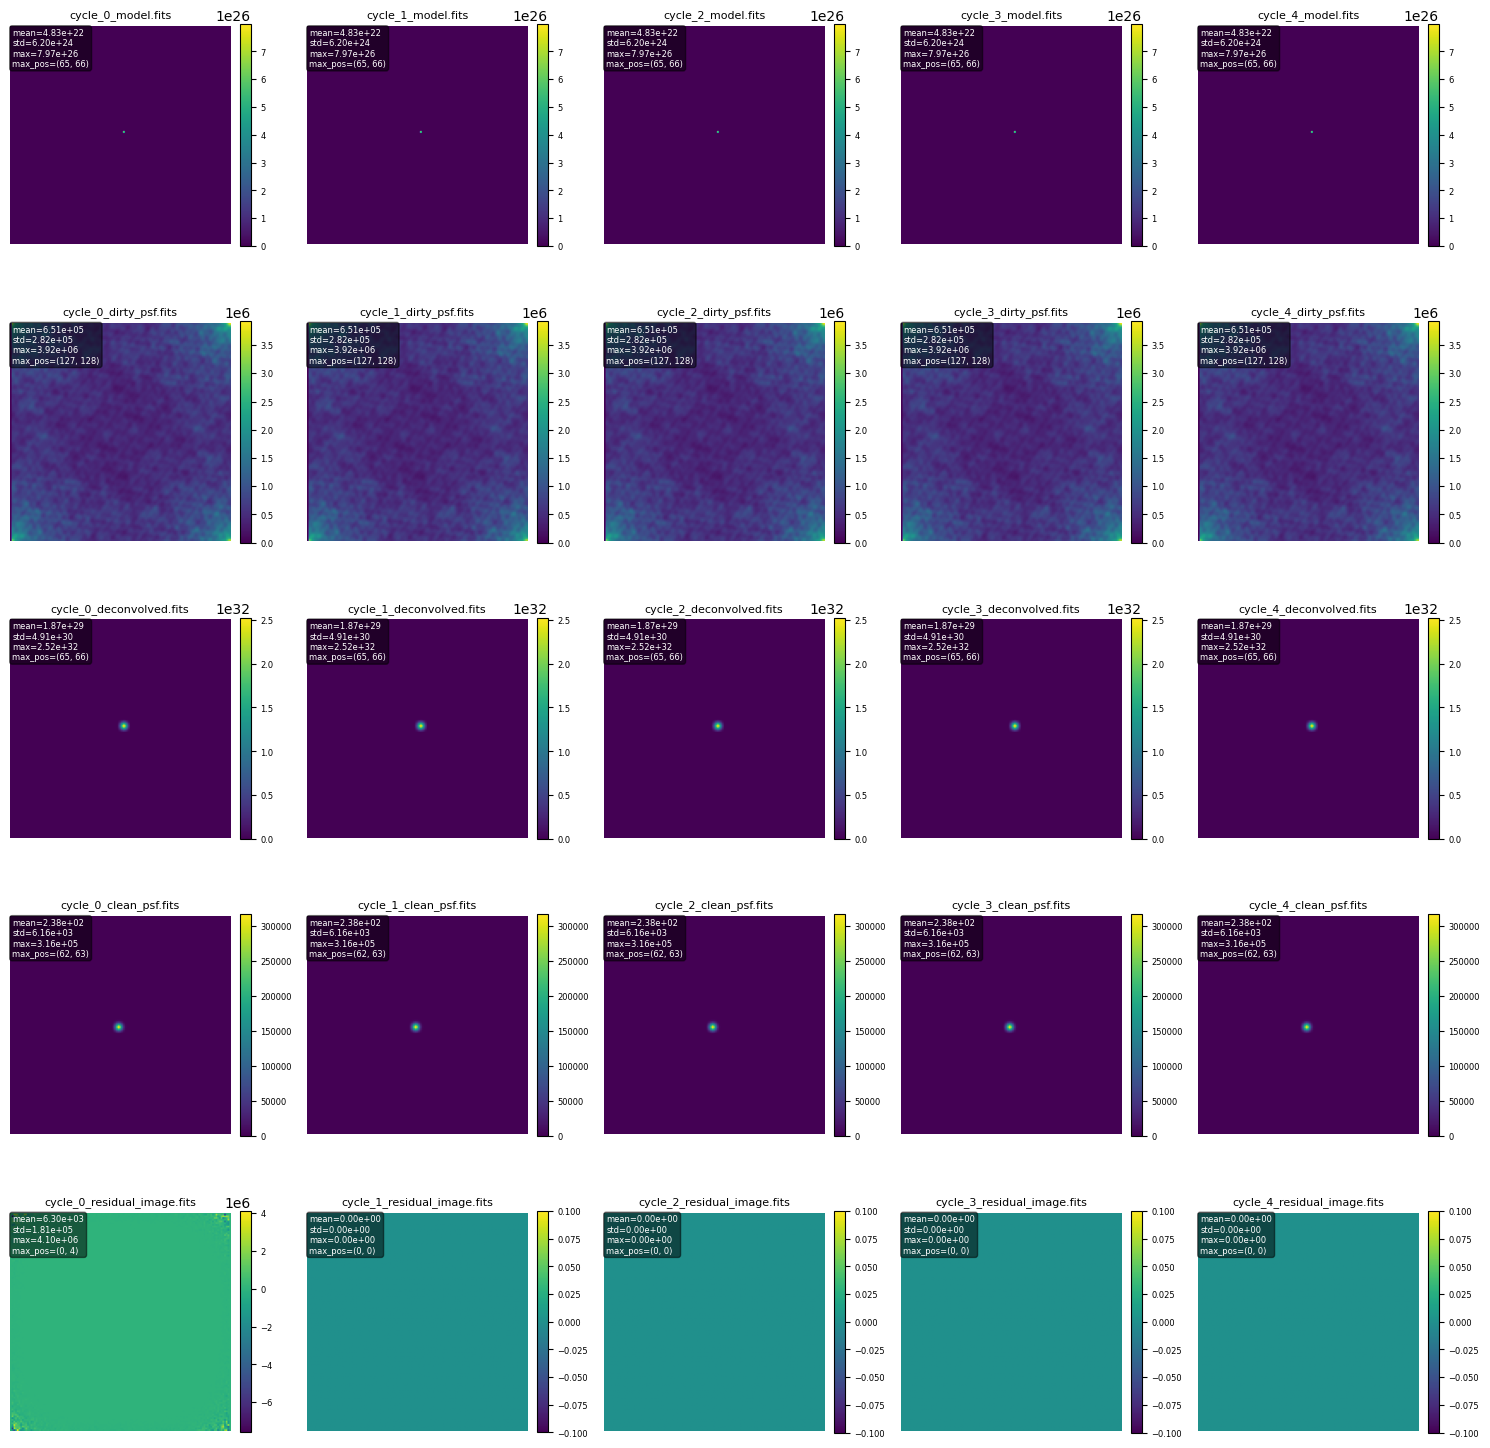

In [27]:
from script.csv_to_fits import *

input_directory = "code_dft_ms/data/output/tune/"
output_directory = "code_dft_ms/data/fits/"
delimiter = ","
convert_all_csv_in_directory(input_directory, output_directory, delimiter)

from script.plot_im import *

base_dir = 'code_dft_ms/data/fits'
types = ['model', 'dirty_psf', 'deconvolved', 'clean_psf', 'residual_image']

display_images_by_type(base_dir, types)

In [2]:
from casacore.tables import table
import numpy as np

ms_path = "sim_small.ms"

print("🔎 Lecture des tables du MeasurementSet...\n")

# MAIN TABLE
print("📦 TABLE: MAIN")
t = table(ms_path)
print(f"Nombre de lignes : {len(t)}")
print(f"Colonnes disponibles : {t.colnames()[:10]}...")
print(f"Extrait temps (TIME) : {t.getcol('TIME')[:3]}")
print(f"Antennes (ANTENNA1, ANTENNA2) : {list(zip(t.getcol('ANTENNA1')[:3], t.getcol('ANTENNA2')[:3]))}")
print(f"Visibilités (DATA) : shape = {t.getcol('DATA').shape}")
print(f"Flags (FLAG) : {t.getcol('FLAG').shape}")
uvw = t.getcol('UVW').T
print(f"Coordonnées UVW : {uvw[:3]}")

print("\n🏗️ TABLE: ANTENNA")
ant = table(f"{ms_path}/ANTENNA")
names = ant.getcol("NAME")
positions = ant.getcol("POSITION")
for i in range(len(names)):
    x, y, z = positions[i]
    print(f"Antenne {i}: {names[i]}, Position = ({x:.2f}, {y:.2f}, {z:.2f}) m")

print("\n🎯 TABLE: FIELD")
field = table(f"{ms_path}/FIELD")
print(f"Nombre de champs : {len(field)}")
print(f"Noms : {field.getcol('NAME')}")
print(f"Directions de phase (PHASE_DIR) : {field.getcol('PHASE_DIR')}")

print("\n🌐 TABLE: SPECTRAL_WINDOW")
spw = table(f"{ms_path}/SPECTRAL_WINDOW")
chan_freq = spw.getcol("CHAN_FREQ")
chan_width = spw.getcol("CHAN_WIDTH")
bandwidth = spw.getcol("TOTAL_BANDWIDTH")
num_chan = spw.getcol("NUM_CHAN")
print(f"Fréquence de début : {chan_freq[0][0]/1e6:.3f} MHz")
print(f"Largeur de canal : {chan_width[0][0]/1e6:.3f} MHz")
print(f"Bande passante : {bandwidth[0]/1e6:.3f} MHz")
print(f"Nombre de canaux : {num_chan[0]}")

print("\n🧪 TABLE: POLARIZATION")
pol = table(f"{ms_path}/POLARIZATION")
print(f"Types de corrélation (CORR_TYPE) : {pol.getcol('CORR_TYPE')}")
print(f"Produits de corrélation (CORR_PRODUCT) : {pol.getcol('CORR_PRODUCT')}")

print("\n📚 TABLE: DATA_DESCRIPTION")
dd = table(f"{ms_path}/DATA_DESCRIPTION")
print(f"Index SPW : {dd.getcol('SPECTRAL_WINDOW_ID')}")
print(f"Index POL : {dd.getcol('POLARIZATION_ID')}")

print("\n📝 TABLE: OBSERVATION")
obs = table(f"{ms_path}/OBSERVATION")
print(f"Télescope : {obs.getcol('TELESCOPE_NAME')}")
print(f"Projet : {obs.getcol('PROJECT')}")
print(f"Observateur : {obs.getcol('OBSERVER')}")
print(f"Plage temporelle : {obs.getcol('TIME_RANGE')}")

print("\n✅ Fin de l’inspection du MeasurementSet.")


🔎 Lecture des tables du MeasurementSet...

📦 TABLE: MAIN
Successful readonly open of default-locked table sim_small.ms: 22 columns, 3924480 rows
Nombre de lignes : 3924480
Colonnes disponibles : ['UVW', 'FLAG', 'FLAG_CATEGORY', 'WEIGHT', 'SIGMA', 'ANTENNA1', 'ANTENNA2', 'ARRAY_ID', 'DATA_DESC_ID', 'EXPOSURE']...
Extrait temps (TIME) : [4.45344995e+09 4.45344995e+09 4.45344995e+09]
Antennes (ANTENNA1, ANTENNA2) : [(0, 1), (0, 2), (0, 3)]
Visibilités (DATA) : shape = (3924480, 1, 1)
Flags (FLAG) : (3924480, 1, 1)
Coordonnées UVW : [[-1.86477493e+02 -4.82820071e+01 -2.58761496e+02 ... -9.39209885e+01
  -4.96345213e+01  4.42864672e+01]
 [ 2.47991299e+02  9.85594327e+01  1.00697160e+02 ...  8.08385604e+00
   2.59074076e+01  1.78235515e+01]
 [-1.74020425e+01 -6.40604999e+00 -1.06689429e+01 ...  2.54925008e+00
   6.78782035e-02 -2.48137187e+00]]

🏗️ TABLE: ANTENNA
Successful readonly open of default-locked table sim_small.ms/ANTENNA: 8 columns, 512 rows
Antenne 0: s0000, Position = (-2564976.

In [3]:
from casacore.tables import table
import numpy as np

ms_path = "/home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS"

print("🔎 Lecture des tables du MeasurementSet...\n")

# MAIN TABLE
print("📦 TABLE: MAIN")
t = table(ms_path)
print(f"Nombre de lignes : {len(t)}")
print(f"Colonnes disponibles : {t.colnames()[:10]}...")
print(f"Extrait temps (TIME) : {t.getcol('TIME')[:3]}")
print(f"Antennes (ANTENNA1, ANTENNA2) : {list(zip(t.getcol('ANTENNA1')[:3], t.getcol('ANTENNA2')[:3]))}")
print(f"Visibilités (DATA) : shape = {t.getcol('DATA').shape}")
print(f"Flags (FLAG) : {t.getcol('FLAG').shape}")
uvw = t.getcol('UVW').T
print(f"Coordonnées UVW : {uvw[:3]}")

print("\n🏗️ TABLE: ANTENNA")
ant = table(f"{ms_path}/ANTENNA")
names = ant.getcol("NAME")
positions = ant.getcol("POSITION")
for i in range(len(names)):
    x, y, z = positions[i]
    print(f"Antenne {i}: {names[i]}, Position = ({x:.2f}, {y:.2f}, {z:.2f}) m")

print("\n🎯 TABLE: FIELD")
field = table(f"{ms_path}/FIELD")
print(f"Nombre de champs : {len(field)}")
print(f"Noms : {field.getcol('NAME')}")
print(f"Directions de phase (PHASE_DIR) : {field.getcol('PHASE_DIR')}")

print("\n🌐 TABLE: SPECTRAL_WINDOW")
spw = table(f"{ms_path}/SPECTRAL_WINDOW")
chan_freq = spw.getcol("CHAN_FREQ")
chan_width = spw.getcol("CHAN_WIDTH")
bandwidth = spw.getcol("TOTAL_BANDWIDTH")
num_chan = spw.getcol("NUM_CHAN")
print(f"Fréquence de début : {chan_freq[0][0]/1e6:.3f} MHz")
print(f"Largeur de canal : {chan_width[0][0]/1e6:.3f} MHz")
print(f"Bande passante : {bandwidth[0]/1e6:.3f} MHz")
print(f"Nombre de canaux : {num_chan[0]}")

print("\n🧪 TABLE: POLARIZATION")
pol = table(f"{ms_path}/POLARIZATION")
print(f"Types de corrélation (CORR_TYPE) : {pol.getcol('CORR_TYPE')}")
print(f"Produits de corrélation (CORR_PRODUCT) : {pol.getcol('CORR_PRODUCT')}")

print("\n📚 TABLE: DATA_DESCRIPTION")
dd = table(f"{ms_path}/DATA_DESCRIPTION")
print(f"Index SPW : {dd.getcol('SPECTRAL_WINDOW_ID')}")
print(f"Index POL : {dd.getcol('POLARIZATION_ID')}")

print("\n📝 TABLE: OBSERVATION")
obs = table(f"{ms_path}/OBSERVATION")
print(f"Télescope : {obs.getcol('TELESCOPE_NAME')}")
print(f"Projet : {obs.getcol('PROJECT')}")
print(f"Observateur : {obs.getcol('OBSERVER')}")
print(f"Plage temporelle : {obs.getcol('TIME_RANGE')}")

print("\n✅ Fin de l’inspection du MeasurementSet.")


🔎 Lecture des tables du MeasurementSet...

📦 TABLE: MAIN
Successful readonly open of default-locked table /home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS: 26 columns, 1477782 rows
Nombre de lignes : 1477782
Colonnes disponibles : ['UVW', 'FLAG_CATEGORY', 'WEIGHT', 'SIGMA', 'ANTENNA1', 'ANTENNA2', 'ARRAY_ID', 'DATA_DESC_ID', 'EXPOSURE', 'FEED1']...
Extrait temps (TIME) : [5.11421094e+09 5.11421094e+09 5.11421094e+09]
Antennes (ANTENNA1, ANTENNA2) : [(0, 0), (0, 1), (1, 1)]
Visibilités (DATA) : shape = (1477782, 8, 4)
Flags (FLAG) : (1477782, 8, 4)
Coordonnées UVW : [[   0.          -21.55703906    0.         ...  316.20355894
   311.437051      0.        ]
 [   0.          -14.37479329    0.         ...  220.2630731
   266.56088134    0.        ]
 [   0.            5.73718968    0.         ... -230.38789538
  -263.10454183    0.        ]]

🏗️ TABLE: ANTENNA
Successful readonly open of default-locked table /home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS/ANTENNA: 10 columns,

In [13]:
from casacore.tables import table
import os
import shutil

def split_ms(ms_path, output_prefix, criterion='time', n_splits=2):
    assert criterion in ['time', 'scan', 'field', 'spw'], "Critère non supporté."

    # Lecture de la table principale
    t = table(ms_path)
    column = None
    colname = None

    if criterion == 'time': #time -> slices according to observation time values
        column = t.getcol('TIME')
        colname = 'TIME'
    elif criterion == 'scan': # scan -> observation sequence without interruption or source changing or configuration
        column = t.getcol('SCAN_NUMBER')
        colname = 'SCAN_NUMBER'
    elif criterion == 'field': # field/source -> slices according to the different sources observed 
        column = t.getcol('FIELD_ID')
        colname = 'FIELD_ID'
    elif criterion == 'spw': # spectral window -> slices according to observed frequency range
        column = t.getcol('DATA_DESC_ID')
        colname = 'DATA_DESC_ID'

    unique_vals = sorted(set(column))
    print(f"📊 {criterion.upper()} values trouvées : {unique_vals}")
    
    # Ajustement automatique de n_splits
    if n_splits > len(unique_vals):
        print(f"⚠️ Seulement {len(unique_vals)} valeurs distinctes pour {colname}, ajustement de n_splits.")
        n_splits = len(unique_vals)


    # Répartition équilibrée des valeurs uniques entre n_splits groupes
    groups = [[] for _ in range(n_splits)]
    for i, val in enumerate(unique_vals):
        groups[i % n_splits].append(val)

    # Création des sous-ensembles
    for i, group_vals in enumerate(groups):
        val_str = ','.join(map(str, group_vals))
        query_str = f"{colname} IN [{val_str}]"
        sub = t.query(query_str)
        out_path = f"{output_prefix}_{criterion}_{i}.ms"
        if os.path.exists(out_path):
            shutil.rmtree(out_path)
        sub.copy(out_path, deep=True)
        print(f"✅ Split {i} : {sub.nrows()} lignes -> {out_path}")

    t.close()


# 🧪 Exemple d’utilisation :
path = "sim_small.ms"
path = "/home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS"
#split_ms(path, "split", criterion="time", n_splits=2)
#split_ms(path, "split", criterion="scan", n_splits=3)
#split_ms(path, "split", criterion="field", n_splits=2)
split_ms(path, "split", criterion="spw", n_splits=2)



Successful readonly open of default-locked table /home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS: 26 columns, 1477782 rows
📊 SPW values trouvées : [0]
⚠️ Seulement 1 valeurs distinctes pour DATA_DESC_ID, ajustement de n_splits.
✅ Split 0 : 1477782 lignes -> split_spw_0.ms
